In [73]:
from sage.all import *
from mubs_utils import testMubs, testMubs2, saveMubs
import numpy as np

In [74]:
%reload_ext line_profiler
%reload_ext autoreload
%autoreload 2

Quick check for dimension for one qutrit.

In [75]:
F = GF(3, 'x')

mubs = [identity_matrix(3)]
for m in F:
    Bm = zero_matrix(SR, 3,3)
    for j, v in enumerate(F):
        for i, w in enumerate(F):
            pwr = ( (1/F(2))*w**2*m + v*w).trace()
            Bm[i,j] = exp(2*I*pi / 3)**Integer(lift(pwr)) * 1/sqrt(3)
    mubs.append(Bm)

In [76]:
for B in mubs:
    print(B)
    print('---')

[1 0 0]
[0 1 0]
[0 0 1]
---
[                        1/3*sqrt(3)                         1/3*sqrt(3)                         1/3*sqrt(3)]
[                        1/3*sqrt(3)       -1/6*sqrt(3)*(-I*sqrt(3) + 1) 1/3*sqrt(3)*(1/2*I*sqrt(3) - 1/2)^2]
[                        1/3*sqrt(3) 1/3*sqrt(3)*(1/2*I*sqrt(3) - 1/2)^2       -1/6*sqrt(3)*(-I*sqrt(3) + 1)]
---
[                        1/3*sqrt(3)                         1/3*sqrt(3)                         1/3*sqrt(3)]
[1/3*sqrt(3)*(1/2*I*sqrt(3) - 1/2)^2                         1/3*sqrt(3)       -1/6*sqrt(3)*(-I*sqrt(3) + 1)]
[1/3*sqrt(3)*(1/2*I*sqrt(3) - 1/2)^2       -1/6*sqrt(3)*(-I*sqrt(3) + 1)                         1/3*sqrt(3)]
---
[                        1/3*sqrt(3)                         1/3*sqrt(3)                         1/3*sqrt(3)]
[      -1/6*sqrt(3)*(-I*sqrt(3) + 1) 1/3*sqrt(3)*(1/2*I*sqrt(3) - 1/2)^2                         1/3*sqrt(3)]
[      -1/6*sqrt(3)*(-I*sqrt(3) + 1)                         1/3*sqrt(3) 1/3*sqrt(3)

In [77]:
testMubs2(mubs)

Testing set 0
Testing set 1
Testing set 2
Testing set 3


True

In [78]:
# saveMubs(mubs, 'MUBS/3-1-desarguesian')

Three qutrits example.

In [79]:
p = 3
n = 3
d = p**n

In [80]:
F = GF(d, 'x'); x = F.gen()
F

Finite Field in x of size 3^3

In [81]:
charpoly(x) # Conways poly again.

x^3 + 2*x + 1

In [82]:
FF = [F(0)] + [x**j for j in range(26)]
FF

[0,
 1,
 x,
 x^2,
 x + 2,
 x^2 + 2*x,
 2*x^2 + x + 2,
 x^2 + x + 1,
 x^2 + 2*x + 2,
 2*x^2 + 2,
 x + 1,
 x^2 + x,
 x^2 + x + 2,
 x^2 + 2,
 2,
 2*x,
 2*x^2,
 2*x + 1,
 2*x^2 + x,
 x^2 + 2*x + 1,
 2*x^2 + 2*x + 2,
 2*x^2 + x + 1,
 x^2 + 1,
 2*x + 2,
 2*x^2 + 2*x,
 2*x^2 + 2*x + 1,
 2*x^2 + 1]

The order of `FF` is the same as Magma's ordering.

Desarguesian spread.

In [83]:
two = F(2)

In [84]:
mubs = [identity_matrix(d)]
for m in FF:
    Bm = zero_matrix(SR, d,d)
    for j, v in enumerate(FF):
        for i, w in enumerate(FF):
            pwr = ( (1/two)*m*w**2 + v*w).trace()
            # pwr = ( m*w**2 + v*w).trace()
            Bm[i,j] = exp(2*I*pi / p)**Integer(pwr) * 1/sqrt(d)
            # Bm[i,j] = Integer(pwr)
    mubs.append(Bm)

The powers don't match with Andres because he forgot to divide by two. Let me just make sure he didn't use some other code by comparing the actual saved MUBs.

In [85]:
saveMubs(mubs, 'MUBS/3-3-desarguesian3.npy')

Saved to MUBS/3-3-desarguesian3.npy


In [88]:
mubs = np.concatenate([m.numpy(dtype='complex64') for m in mubs])
mubs.shape

(756, 27)

In [60]:
from scipy.io import loadmat

In [61]:
amubs = loadmat('MUBS/andres-MUBQT.mat')

In [62]:
amubs = amubs['M1']
amubs.shape

(756, 27)

In [63]:
k = 1
np.all(np.isclose(amubs[27*k:27*(k+1)], mubs[27*k:27*(k+1)]))

True

In [21]:
import matplotlib.pyplot as plt

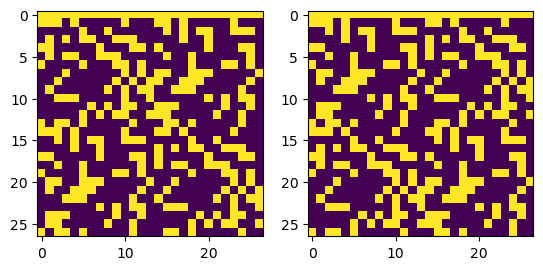

In [22]:
k = 5

fig, axs = plt.subplots(1,2)
axs[0].imshow(np.real(mubs[27*k:27*(k+1)]))
axs[1].imshow(np.real(amubs[27*k:27*(k+1)]))

So no doubt that they are different. Next step is to check if they are MUBs.

In [64]:
np.linalg.norm(mubs[27:54,7])

1.0

In [65]:
mubs.shape

(756, 27)

In [86]:
def mubTest(mubs):
    n, m = mubs.shape
    h = n // 27
    M = [mubs[27*k:27*(k+1)] for k in range(h)]
    for i, B1 in enumerate(M):
        for j, B2 in enumerate(M):
            if i != j:
                for s in range(27):
                    for r in range(27):
                        inp = np.abs(np.conj(B1[:,s]).T @ B2[:,r])**2
                        if not np.isclose(inp, 1/27, rtol=1e-5):
                            print(i, j, s, r, inp)
                            raise Exception('Not MUBs!')
        print('Set {} passed.'.format(i))

In [89]:
mubTest(mubs)

Set 0 passed.
Set 1 passed.
Set 2 passed.
Set 3 passed.
Set 4 passed.
Set 5 passed.
Set 6 passed.
Set 7 passed.
Set 8 passed.
Set 9 passed.
Set 10 passed.
Set 11 passed.
Set 12 passed.
Set 13 passed.
Set 14 passed.
Set 15 passed.
Set 16 passed.
Set 17 passed.
Set 18 passed.
Set 19 passed.
Set 20 passed.
Set 21 passed.
Set 22 passed.
Set 23 passed.
Set 24 passed.
Set 25 passed.
Set 26 passed.
Set 27 passed.


In [68]:
mubTest(amubs)

Set 0 passed.
1 11 0 0 1.0000000000000004


Exception: Not MUBs!

In [69]:
amubs[27*1:27*2,0]

array([0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j,
       0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j,
       0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j,
       0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j,
       0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j,
       0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j,
       0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j])

In [70]:
amubs[27*11:27*12,0]

array([0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j,
       0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j,
       0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j,
       0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j,
       0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j,
       0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j,
       0.19245009+0.j, 0.19245009+0.j, 0.19245009+0.j])

In [71]:
np.all(amubs[27*1:27*2] == amubs[27*11:27*12])

True

Andres' set is not mutually unbiased, the set 1 and 11 share a same vector and their inner product squared is not $1/27$.

In [72]:
np.abs(np.conj(amubs[27*1:27*2,0]).T @ amubs[27*11:27*12,0])**2

1.0000000000000004

In [ ]:
# saveMubs(mubs, 'MUBS/3-3-desarguesian')
# (np.load('MUBS/3-3-desarguesian.npy')).shape

So the Desarguesian spread of course produces MUBs. Too large to check with sagemaths low speeds. Now unto Kantor spread given by Alberts twisted fields. The operation is given by:
$$w \circ m = mw^9 + m^3 w^3.$$

In [189]:
mubs = [identity_matrix(d)]
for m in F:
    Bm = zero_matrix(SR, d,d)
    for j, v in enumerate(FF):
        for i, w in enumerate(FF):
            # pwr = ( w*(m*w**9 + m**3*w**3)/two + v*w ).trace()
            # pwr = (w*(m*w**9 + m**3*w**3)).trace()
            pwr = (w*m).trace()
            # Bm[i,j] = exp(2*I*pi / p)**Integer(pwr) * 1/sqrt(d)
            # Bm[i,j] = Integer(pwr)
    mubs.append(Bm)

In [191]:
print(mubs[2])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [193]:
mubsk = np.load('MUBS/3-3-albert.npy')
amubsk = loadmat('MUBS/andres-MUBKQT.mat')
amubsk = amubsk['MUBKQT']

In [194]:
amubsk.shape

(756, 27)

In [217]:
amubsk[27*k:27*(k+1)].dtype

dtype('complex128')

In [234]:
for k in range(27):
    print(k, np.all(np.isclose(amubsk[27*k:27*(k+1)], mubsk[27*k:27*(k+1)], rtol=1e-6)))

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 False
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 False
22 True
23 True
24 True
25 True
26 True


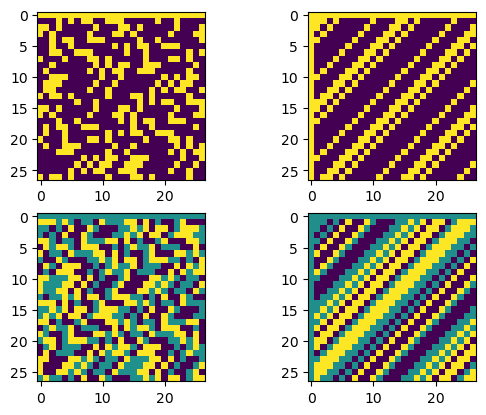

In [237]:
k = 21

fig, axs = plt.subplots(2,2)
axs[0][0].imshow(np.real(mubsk[27*k:27*(k+1)]))
axs[0][1].imshow(np.real(amubsk[27*k:27*(k+1)]))
axs[1][0].imshow(np.imag(mubsk[27*k:27*(k+1)]))
axs[1][1].imshow(np.imag(amubsk[27*k:27*(k+1)]))

They are mostly the same, but he seems to have some problem saving them because he repeats the 1, 11 and 21 set:

In [240]:
np.all(amubsk[27*1:27*2] == amubsk[27*11:27*12])

True

In [241]:
np.all(amubsk[27*1:27*2] == amubsk[27*21:27*22])

True

In [ ]:
# saveMubs(mubs, 'MUBS/3-3-albert')
# (np.load('MUBS/3-3-albert.npy')).shape